In [1]:
!pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install openpyxl

In [4]:
gitlinks = [
    "https://raw.githubusercontent.com/LiyaT3/Data_Files/main/fee_train.xlsx",
    "https://raw.githubusercontent.com/LiyaT3/Data_Files/main/fee_test.xlsx"
]


In [5]:
train = pd.read_excel(gitlinks[0], engine='openpyxl')
test = pd.read_excel(gitlinks[1])

In [6]:
train.head(3)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [8]:
train.describe(include = 'object')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,5961,5961,2659,5936,5961,3341
unique,1420,64,51,877,6,2998
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...
freq,488,323,684,75,1397,40


In [9]:
train.shape

(5961, 7)

In [10]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [11]:
train['Experience']= train['Experience'].str.split().str[0]
train['Experience']= train['Experience'].astype(int)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int64 
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 326.1+ KB


In [13]:
train['Experience'].head(3)

0    24
1    12
2     9
Name: Experience, dtype: int64

In [14]:
train['Place'].fillna('Unknown', inplace = True)

In [15]:
train['Locality'] = train['Place'].str.split().str[0]
train['city'] = train['Place'].str.split().str[1]

In [16]:
train.head(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Locality,city
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,"Kakkanad,",Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,"Whitefield,",Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere,-
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta,"Road,"
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,"Keelkattalai,",Chennai


In [17]:
train.drop('Place', axis = 1 , inplace = True)

In [18]:
train['Rating'].fillna('-1%', inplace = True)

In [19]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Locality                 0
city                    26
dtype: int64

In [20]:
train['Rating'] = train['Rating'].str.slice(stop = -1).astype(int)

In [21]:
bins = [-1, 0, 10, 20, 30, 40, 50,60, 70, 80, 90, 100]
labels=[ i for i in range(11)]
train['Rating'] = pd.cut(train['Rating'], bins = bins, labels=labels)

In [22]:
train['Rating'].value_counts().sort_index()

0        0
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [23]:
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Profile',
       'Miscellaneous_Info', 'Fees', 'Locality', 'city'],
      dtype='object')

In [24]:
train['Qualification_count'] = train['Qualification'].apply(lambda x: len(x.split(",")))
train[train['Qualification_count']== 10]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Locality,city,Qualification_count
2035,"Fellowship in Oral implantlogy, Certified Adva...",22,10,Dentist,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,300,Ashok,"Nagar,",10


In [25]:
train['Qualification'].nunique()

1420

In [26]:
train['Qualification'].head(5)

0             BHMS, MD - Homeopathy
1      BAMS, MD - Ayurveda Medicine
2    MBBS, MS - Otorhinolaryngology
3               BSc - Zoology, BAMS
4                              BAMS
Name: Qualification, dtype: object

In [27]:
train['Qualification'] = train['Qualification'].str.split(",")
Qualification = {}
for x in train['Qualification'].values:
  for qual in x:
    qual = qual.strip()
    if qual in Qualification:
      Qualification[qual] +=1
    else:
      Qualification[qual] = 1

In [28]:
print(Qualification)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

In [29]:
top_ten = sorted(Qualification.items(),key  = lambda x: x[1] , reverse = True)[:10]
final_qual = []
for qual in top_ten:
  final_qual.append(qual[0])

In [30]:
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [32]:
for qual in final_qual:
  train[qual]=0

for x,y in zip(train['Qualification'].values, np.array([i for i in range(len(train))])):

  for z in x:

    z=z.strip()
    if z in final_qual:

      train[z][y] = 1

<ipython-input-32-365596536599>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[z][y] = 1


In [33]:
train.drop(['Qualification', 'Qualification_count'], axis = 1 , inplace = True)

In [35]:
train.columns

Index(['Experience', 'Rating', 'Profile', 'Miscellaneous_Info', 'Fees',
       'Locality', 'city', 'MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology',
       'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy'],
      dtype='object')

In [36]:
train['city'].unique()

array(['Ernakulam', 'Bangalore', '-', 'Road,', 'Chennai', 'Bagh,',
       'City,', 'Lights,', 'Hyderabad', 'Racecourse,', 'Hills,', 'Delhi',
       'Nagar,', 'West,', 'Layout,', 'Coimbatore', 'Enclave,', 'Mumbai',
       'Thiruvananthapuram', 'Colony,', 'Park,', 'East,', 'Extension,',
       'Friends', 'Rao', 'New', 'Vihar,', nan, 'Nagar', 'Medical',
       'Nizamuddin,', 'Rajendra', 'Layout', 'Town,', 'Kailash',
       'Extension', '3rd', 'Puri,', 'House,', 'Corner,', 'Garden,',
       'Ganj,', 'Vihar', 'Point,', 'Beach,', '1', 'Raman', 'Puram,',
       'Town', 'Halli,', 'Park', 'Sector', 'Lines,', 'Kunj,', 'Mambalam,',
       'city,', 'Hazari,', 'Annamalai', 'Bowenpally,', 'College,', '4',
       'Marredpally,', 'Circle,', 'Parade,', 'Ghoda,', 'Niketan,',
       'Kailash,', 'Aerodrome,', '1st', '5', '9', 'Bhayandar,', 'Airport',
       'BEL', 'Of', 'Museum,', 'Sarai,', 'Square,', 'Jn,', '2nd',
       'Ukkadam,', 'North,', 'Seemapuri,', 'Bazar,', 'Parel,', 'Market,',
       'Khas,', '

In [ ]:
import re

In [40]:
train['city'] = train['city'].apply(lambda x: re.sub(' +','', str(x)))
train['city'].value_counts()

Hyderabad     680
Chennai       659
Bangalore     653
West,         561
Nagar,        433
             ... 
Museum,         1
Aerodrome,      1
Hazari,         1
Beach,          1
Fort,           1
Name: city, Length: 129, dtype: int64

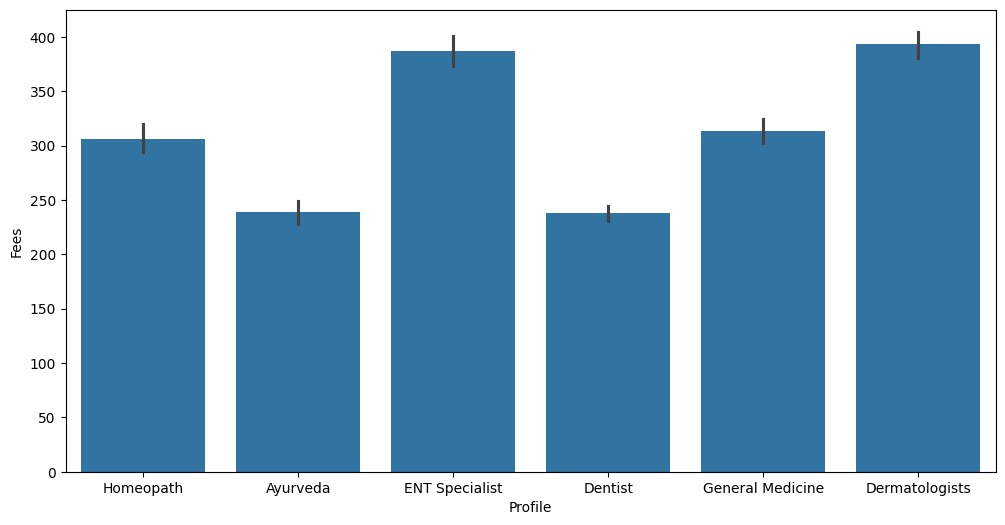

In [42]:
plt.figure(figsize = (12,6))
sns.barplot(x= 'Profile' , y='Fees', data = train)
plt.show()

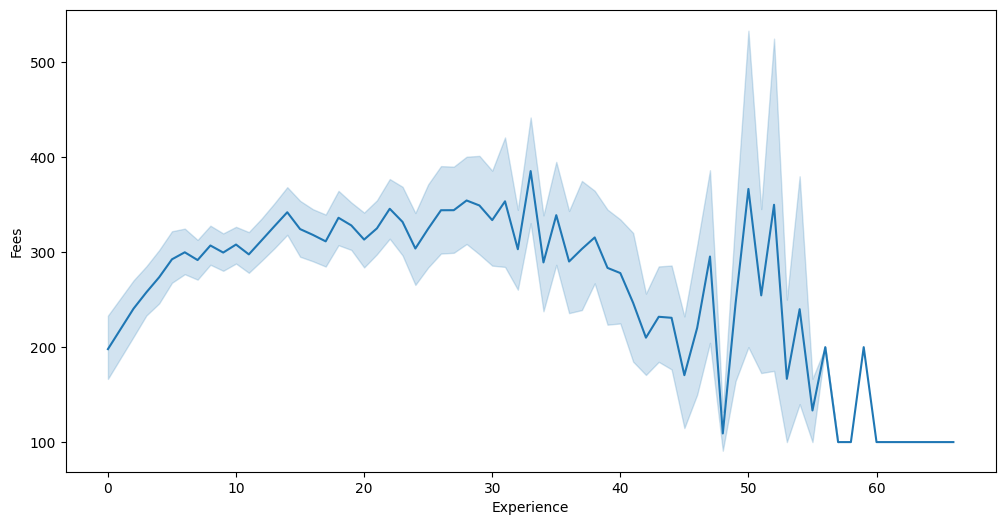

In [44]:
plt.figure(figsize = (12,6))
sns.lineplot(x= 'Experience' , y='Fees', data = train)
plt.show()

In [47]:
train['city'].value_counts()

Hyderabad     680
Chennai       659
Bangalore     653
West,         561
Nagar,        433
             ... 
Museum,         1
Aerodrome,      1
Hazari,         1
Beach,          1
Fort,           1
Name: city, Length: 129, dtype: int64

In [48]:
train = pd.get_dummies(train, columns = ['Profile'], prefix=['Profile'])

In [ ]:
train.head(10)

In [51]:
train.drop(['Miscellaneous_Info', 'Locality'], axis = 1, inplace = True)

In [52]:
train.isnull().sum()

Experience                                 0
Rating                                  3302
Fees                                       0
city                                       0
MBBS                                       0
BDS                                        0
BAMS                                       0
BHMS                                       0
MD - Dermatology                           0
MS - ENT                                   0
Venereology & Leprosy                      0
MD - General Medicine                      0
Diploma in Otorhinolaryngology (DLO)       0
MD - Homeopathy                            0
Profile_Ayurveda                           0
Profile_Dentist                            0
Profile_Dermatologists                     0
Profile_ENT Specialist                     0
Profile_General Medicine                   0
Profile_Homeopath                          0
dtype: int64